In [1]:
import pandas as pd
import seaborn as sns
import spacy
import re
from wordcloud import WordCloud
from tqdm import tqdm
tqdm.pandas()
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('twitter_training.csv', header=None)


data.columns = ['ID', 'game', 'label', 'text']


data.sample(5)

,ID,game,label,text
20867,12772,WorldOfCraft,Neutral,I just earned the [Horrific Video] Award!
43503,10268,PlayerUnknownsBattlegrounds(PUBG),Positive,Doing anything in extreme will cause conseque...
12558,8558,NBA2K,Negative,
39496,5579,Hearthstone,Positive,Looks like a fairly good arena practice deck s...
37696,5263,Hearthstone,Negative,hearthstone video announcement videos always g...


In [3]:
cols_to_drop = ['ID','game']
data = data.drop(cols_to_drop,axis=1)
data.sample(5)

,label,text
11367,Irrelevant,twitch.tv/bradb_5133 come follow I wanna follo...
69875,Irrelevant,"I see Studio Trigger, to get excited"
73539,Negative,RhandlerR why in the NAME OF GOD did your webs...
2488,Neutral,Looks dope but don ’ ta t wanna tell me everyo...
68354,Positive,I'm very pleased to see everyone playing cyber...


In [4]:
data = data[~data['label'].isin(['Neutral', 'Irrelevant'])]

data.sample(5)

,label,text
6404,Positive,"LOVE!! United States We hope to help, thank yo..."
10225,Positive,Xbox Series X seems to be a must for console g...
48974,Negative,@ EAHelp good evening i can't access fifa it d...
12717,Negative,bro what? g lmaooo ima be mad as hell
46734,Positive,People are spending! Home Depot and Lowes are ...


In [5]:
data['label'] = data['label'].replace({'Positive': 1, 'Negative': 0})

<Axes: xlabel='label', ylabel='count'>

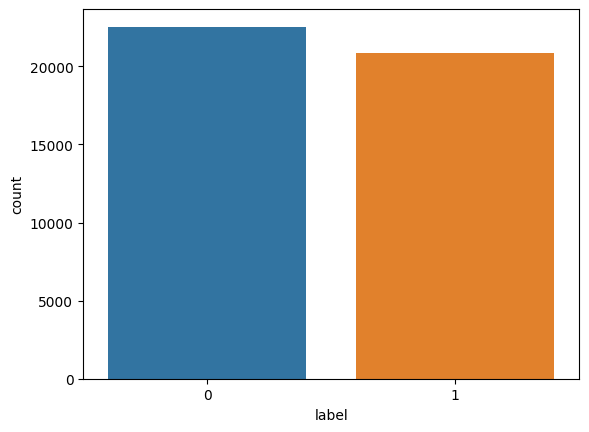

In [6]:
sns.countplot(x='label', data=data)

In [7]:
data['text'] = data['text'].str.lower()
data.sample(5)

,label,text
58138,0,1 rhandlerr this is not epic :( i was one game...
9528,0,"i don’t want a ps5 or xbox x/s , just get me a..."
30393,1,i also die for kindred
33709,1,well done:)
25740,0,@ubisoft @assassinscreed please make a constan...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43374 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   43374 non-null  int64 
 1   text    43013 non-null  object
dtypes: int64(1), object(1)
memory usage: 1016.6+ KB


In [9]:
data['text'] = data['text'].astype(str)


In [10]:
re_url = re.compile(r'((www.[^\s]+)|(https?://[^\s]+))')
data['text'] = data['text'].apply(lambda x: re_url.sub('', x))

re_letter = re.compile(r"[^a-z\s']")
data['text'] = data['text'].apply(lambda x: re_letter.sub('', x))
data.sample(5)

,label,text
63629,0,i know ea was praying for some sort of histori...
66677,0,i a wanna kno why tf this studies start half a...
68912,1,can't wait to play this hopefully crown don't ...
58701,1,wow
11512,1,that was completely superb from xbox real fun ...


In [70]:
!pip install -U spacy
!python -m spacy download en_core_web_md

2024-01-07 18:33:46.212647: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-07 18:33:46.212720: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-07 18:33:46.214559: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-07 18:33:47.427602: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 20.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [71]:
nlp = spacy.load('en_core_web_md', disable=['ner', 'parser'])
nlp.add_pipe('sentencizer')

In [72]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [74]:
def remove_stopwords(text):
  return ' '.join(filter(lambda x: x not in nlp.Defaults.stop_words, text.split()))

data['text'] = data['text'].apply(remove_stopwords)
data.sample(5)

,label,text
43638,1,pubg therapeutic
27420,1,happen epic cinematic trailer gameplay pump
49373,0,easportsfifa eafifadirect sort fifa trial day ...
35311,1,preorder sexy controller
39226,1,thank greatly watch play thank giveaway new em...


In [76]:
data.drop_duplicates(subset='text', keep='first', inplace=True)

In [77]:
def lemmatize(text):
  return ' '.join([x.lemma_ for x in nlp(text)])

data['text'] = data['text'].progress_apply(lemmatize)
data.sample(5)

100%|██████████| 33693/33693 [01:55<00:00, 292.48it/s]


,label,text
14851,1,wait lebron play earthshaker sceptre
13148,0,nk nba store close
4032,1,perfect
27136,1,pm est tonight pirate run assasin creed odsses...
55080,0,duty dead year ve play evil twin brother pose cod


In [79]:

X_train, X_val, y_train, y_val = train_test_split(data['text'], data['label'], test_size=0.1, random_state=42)

In [80]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_val_tokens = tokenizer.texts_to_sequences(X_val)

vocab_size = len(tokenizer.word_index) + 1
max_len = max(len(seq) for seq in X_train_tokens)

X_train_tokens = pad_sequences(X_train_tokens, maxlen=max_len, padding='post')
X_val_tokens = pad_sequences(X_val_tokens, maxlen=max_len, padding='post')

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Conv1D, GlobalMaxPooling1D

embedding_dim = 50

model_2 = Sequential()
model_2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model_2.add(Conv1D(128, 5, activation='relu'))
model_2.add(GlobalMaxPooling1D())
model_2.add(Dense(1, activation='sigmoid'))
print(model_2.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 161, 50)           890250    
                                                                 
 conv1d_3 (Conv1D)           (None, 157, 128)          32128     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 922507 (3.52 MB)
Trainable params: 922507 (3.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [82]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_cnn = model_2.fit(X_train_tokens, y_train, epochs=3, validation_data=(X_val_tokens, y_val))

Epoch 1/3
948/948 [==============================] - 34s 30ms/step - loss: 0.3604 - accuracy: 0.8343 - val_loss: 0.2330 - val_accuracy: 0.9098
Epoch 2/3
948/948 [==============================] - 7s 7ms/step - loss: 0.1387 - accuracy: 0.9480 - val_loss: 0.1860 - val_accuracy: 0.9261
Epoch 3/3
948/948 [==============================] - 7s 7ms/step - loss: 0.0672 - accuracy: 0.9742 - val_loss: 0.1876 - val_accuracy: 0.9246


In [83]:
print(" Accuracy on Val data: ",model_2.evaluate(X_val_tokens,y_val)[1] *100 ,"%")

106/106 [==============================] - 0s 2ms/step - loss: 0.1876 - accuracy: 0.9246
 Accuracy on Val data:  92.46290922164917 %


In [84]:
def prepare_sentence(sentence):

    sentence = sentence.lower()

    re_url = re.compile(r'((www.[^\s]+)|(https?://[^\s]+))')
    sentence = re_url.sub('', sentence)

    re_letter = re.compile(r"[^a-z\s']")
    sentence = re_letter.sub('', sentence)

    def remove_stopwords(text):
        return ' '.join(filter(lambda x: x not in nlp.Defaults.stop_words, text.split()))

    sentence = remove_stopwords(sentence)

    def lemmatize(text):
        return ' '.join([x.lemma_ for x in nlp(text)])

    sentence = lemmatize(sentence)

    tokenized_sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(tokenized_sentence, maxlen=max_len, padding='post')

    return sentence

In [85]:
def predict_sentiment(model, sentence):

    prepared_sentence = prepare_sentence(sentence)
    prediction = model.predict(prepared_sentence)

    if prediction >= 0.5:
        return "POSITIVE SENTENCE"
    else:
        return "NEGATIVE SENTENCE"

In [86]:
sentence = "I love this game"
result = predict_sentiment(model_2, sentence)
print(result)

1/1 [==============================] - 0s 302ms/step
POSITIVE SENTENCE


In [88]:
sentence = "I hate this fucking game"
result = predict_sentiment(model_2, sentence)
print(result)

1/1 [==============================] - 0s 32ms/step
NEGATIVE SENTENCE
